In [10]:
# pip install delayed
# !pip install scikit-survival

     |████████████████████████████████| 85 kB 889 kB/s            
     |████████████████████████████████| 72 kB 430 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("selected.csv", index_col = False)
df.drop(["Unnamed: 0"], inplace = True, axis = 1)
df = df.replace(' NA', np.nan)
df = df.replace('NA', np.nan)
df.head()

,219340_s_at,217771_at,202418_at,206295_at,201091_s_at,204015_s_at,200726_at,200965_s_at,210314_x_at,221882_s_at,...,t.dmfs,e.dmfs,t.tdm,e.tdm,risksg,NPI,risknpi,AOL_os_10y,risk_AOL,veridex_risk
0,7.014110,9.938705,11.053083,5.326001,10.964107,6.244280,10.926361,8.962608,10.523859,10.926365,...,723,1,723,1,2,4.6,2,62.7,1,Poor
1,7.326724,6.374728,10.596457,8.290123,11.594716,6.542130,12.242090,9.531718,10.342614,9.555092,...,6591,0,6591,0,2,4.6,2,69.0,1,Poor
2,6.974651,9.226757,10.834848,5.731169,9.166088,6.586000,11.661716,10.238680,10.144875,9.308048,...,524,1,524,1,2,4.5,2,66.2,1,Poor
3,7.703683,8.169183,11.627066,8.538247,9.086937,8.477335,12.174021,9.819279,10.888251,10.208241,...,6255,1,6255,0,2,4.36,2,84.9,1,Poor
4,6.581141,7.496745,11.500773,5.979282,8.887616,7.398170,11.484011,11.489233,9.702690,10.931843,...,3822,1,3822,1,2,3.6,2,80.2,1,Poor


In [19]:
df['NPI'] = df['NPI'].astype('float')
df['NPI'].replace(np.nan, df['NPI'].mean(), inplace = True)

In [20]:
df.isna().sum(axis = 0).sort_values()[-10:]

203391_at        0
204768_s_at      0
208180_s_at      0
217815_at        0
risksg           1
risknpi          2
grade            2
Histtype         4
Angioinv        77
Lymp_infil     117
dtype: int64

In [21]:
removals = ['t.rfs', 'e.rfs', 't.os', 'e.os', 't.dmfs','e.dmfs', 't.tdm', 'e.tdm', "samplename", "id","filename","hospital", 'Surgery_type', 'Histtype', 'Angioinv', 'Lymp_infil', 'node', 'grade', 'er', 'risksg', 'risknpi', 'risk_AOL', 'veridex_risk']
rest = [i for i in df.columns if i not in removals]

In [23]:
df[['e.tdm', 't.tdm']]

,e.tdm,t.tdm
0,1,723
1,0,6591
2,1,524
3,0,6255
4,1,3822
...,...,...
193,0,5673
194,1,404
195,0,2225
196,0,2722


In [77]:
X = df[rest]
y = pd.DataFrame(df[['e.tdm', 't.tdm']])
y.columns = ['event', 'time']
y['event'] = y['event'] == 1
y = [tuple(row) for row in y.values]
out = np.empty(len(y), dtype =[('fstat', '?'), ('lenfol', '<f8')])
out[:] = y
out

array([( True,  723.), (False, 6591.), ( True,  524.), (False, 6255.),
       ( True, 3822.), (False, 6507.), (False, 5947.), (False, 5816.),
       (False, 6007.), ( True, 1233.), ( True, 1136.), (False, 5984.),
       (False, 6249.), ( True, 4066.), ( True,  690.), ( True,  994.),
       ( True,  434.), ( True, 1743.), ( True, 2863.), (False, 5693.),
       (False, 5823.), (False, 5785.), (False, 5661.), (False, 2909.),
       ( True, 1171.), (False, 5110.), (False, 5533.), (False, 5571.),
       (False, 5519.), (False, 5379.), (False, 4675.), (False, 4652.),
       (False, 4227.), ( True,  910.), (False, 4472.), ( True, 1206.),
       (False, 7057.), (False,  958.), (False, 5359.), (False, 5945.),
       (False, 5651.), ( True,  528.), ( True,  796.), (False, 5685.),
       ( True, 1023.), (False, 4791.), (False, 1215.), (False, 3779.),
       (False, 5306.), (False, 5678.), ( True,  421.), (False, 5612.),
       ( True, 3121.), (False, 1104.), (False, 4691.), (False, 5238.),
      

In [12]:
X.isna().sum(axis  = 0).sort_values()[-10:]

211762_s_at    0
203391_at      0
204768_s_at    0
208180_s_at    0
204740_at      0
202240_at      0
212014_x_at    0
204014_at      0
NPI            0
AOL_os_10y     0
dtype: int64

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, out, test_size=0.40, random_state=42)

In [79]:
y_train

array([(False, 5661.), (False, 5723.), (False, 5779.), ( True,  910.),
       (False, 5984.), (False, 5683.), ( True, 1598.), (False, 5947.),
       (False, 5571.), (False, 1290.), ( True, 3822.), (False, 4227.),
       (False, 4681.), (False, 2196.), ( True, 4618.), (False, 5909.),
       ( True, 1136.), (False, 5316.), (False, 4181.), (False, 5860.),
       ( True,  723.), (False, 5038.), (False, 4866.), (False, 2105.),
       (False, 5035.), (False, 5012.), ( True, 1023.), (False, 6240.),
       (False, 5519.), (False, 5651.), (False, 2892.), ( True, 1742.),
       (False, 3614.), (False, 5110.), (False, 2909.), (False, 4487.),
       ( True, 2349.), (False, 1554.), ( True,  269.), (False, 3608.),
       (False, 3771.), (False, 5945.), (False, 5228.), (False, 5406.),
       (False, 3964.), (False, 3800.), ( True, 4050.), (False, 7023.),
       (False, 2972.), (False, 3779.), (False, 2965.), (False, 5678.),
       (False, 5685.), (False, 8711.), (False, 6255.), (False, 1591.),
      

In [80]:
# Random Survival Forest
rsf = RandomSurvivalForest(n_estimators = 1000, 
                          min_samples_split=10, 
                          min_samples_leaf=15,
                          max_features="sqrt", 
                          random_state=0)
rsf.fit(X_train, y_train)

RandomSurvivalForest(max_features='sqrt', min_samples_leaf=15,
                     min_samples_split=10, n_estimators=1000, random_state=0)

In [82]:
rsf.score(X_test, y_test)

0.6518171160609613

In [83]:
rsf.predict(X_test), y_test

(array([2.36778019, 3.71649333, 3.09145212, 3.05935692, 1.54038943,
        2.98926615, 3.21598113, 2.41973118, 4.7984828 , 3.69512519,
        2.42254871, 2.94310207, 4.13335642, 3.66701234, 2.79447455,
        1.9884437 , 4.32573477, 2.41053976, 2.92101223, 4.04287685,
        2.68097494, 2.47897347, 3.32766992, 2.45819147, 3.06658904,
        3.39719587, 2.79655016, 4.22267182, 3.07643031, 3.8833103 ,
        2.57624552, 3.23101423, 3.0255278 , 3.36307946, 2.88379203,
        2.08863746, 3.42393915, 3.62422123, 2.6015205 , 2.71887339,
        2.32584205, 2.01330805, 2.47747665, 3.23583646, 1.6831298 ,
        3.90017458, 2.09727829, 1.9375535 , 3.76041872, 3.90020652,
        3.02522603, 2.60070531, 2.03439015, 3.07039372, 3.19126158,
        2.61583322, 4.00062741, 1.59198761, 1.85344277, 2.77759381,
        2.44492181, 2.61260987, 2.76412061, 2.33857097, 2.33132854,
        3.706679  , 4.07645468, 3.92883702, 3.15955803, 1.81695081,
        1.80168464, 2.80410441, 3.17949878, 4.50

In [86]:
rsf.predict_cumulative_hazard_function(X_test)

array([StepFunction(x=array([ 125.,  269.,  404.,  421.,  530.,  649.,  690.,  723.,  910.,
       1023., 1136., 1598., 1742., 1743., 2349., 3121., 3822., 4050.,
       4066., 4212., 4353., 4415., 4618.]), y=array([0.00444645, 0.01138987, 0.01607978, 0.02169709, 0.0309254 ,
       0.03907805, 0.04847981, 0.05630495, 0.06533047, 0.07377585,
       0.08439878, 0.0957768 , 0.10084529, 0.1084732 , 0.12242669,
       0.13293131, 0.14306182, 0.16009745, 0.17423574, 0.18706272,
       0.21364117, 0.22956251, 0.24775898]), a=1.0, b=0.0),
       StepFunction(x=array([ 125.,  269.,  404.,  421.,  530.,  649.,  690.,  723.,  910.,
       1023., 1136., 1598., 1742., 1743., 2349., 3121., 3822., 4050.,
       4066., 4212., 4353., 4415., 4618.]), y=array([0.01214825, 0.02203622, 0.03002893, 0.04062598, 0.05683047,
       0.06953662, 0.08054518, 0.09532361, 0.10871049, 0.1240337 ,
       0.1349684 , 0.15189961, 0.16292506, 0.17279468, 0.19228433,
       0.20832163, 0.22618209, 0.25354938, 0.27818901, 

In [87]:
rsf.predict_survival_function(X_test)

array([StepFunction(x=array([ 125.,  269.,  404.,  421.,  530.,  649.,  690.,  723.,  910.,
       1023., 1136., 1598., 1742., 1743., 2349., 3121., 3822., 4050.,
       4066., 4212., 4353., 4415., 4618.]), y=array([0.99555355, 0.98864683, 0.98408686, 0.97878135, 0.96989699,
       0.96231076, 0.9535612 , 0.94666657, 0.9387873 , 0.93175068,
       0.92282746, 0.91321627, 0.90897797, 0.9028857 , 0.89133839,
       0.88356182, 0.87593064, 0.86334312, 0.8537258 , 0.84328927,
       0.82250172, 0.81048026, 0.79772436]), a=1.0, b=0.0),
       StepFunction(x=array([ 125.,  269.,  404.,  421.,  530.,  649.,  690.,  723.,  910.,
       1023., 1136., 1598., 1742., 1743., 2349., 3121., 3822., 4050.,
       4066., 4212., 4353., 4415., 4618.]), y=array([0.98785175, 0.97811541, 0.9703521 , 0.96033633, 0.94503604,
       0.93348601, 0.92367777, 0.9108619 , 0.89959407, 0.88722361,
       0.87851724, 0.86487529, 0.8562339 , 0.84862218, 0.83360247,
       0.8220682 , 0.80944538, 0.79073427, 0.77513076, 

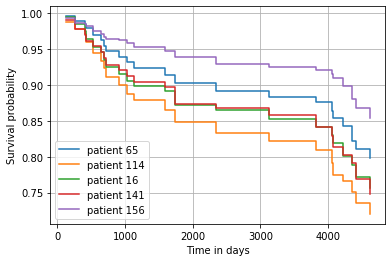

In [91]:
Xplot = X_test[:5]
yplot = y_test[:5]

for i, survfunc in enumerate(rsf.predict_survival_function(Xplot, return_array=True)):
    plt.step(rsf.event_times_, survfunc, where="post", label=f"patient {Xplot.iloc[i].name}")
plt.xlabel("Time in days")
plt.ylabel("Survival probability")
plt.legend()
plt.grid(True)

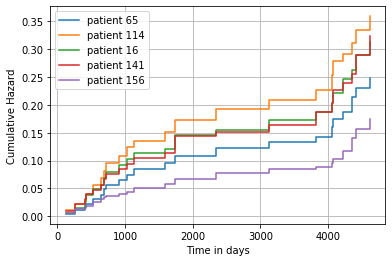

In [93]:
for i, survfunc in enumerate(rsf.predict_cumulative_hazard_function(Xplot, return_array=True)):
    plt.step(rsf.event_times_, survfunc, where="post", label=f"patient {Xplot.iloc[i].name}")
plt.xlabel("Time in days")
plt.ylabel("Cumulative Hazard")
plt.legend()
plt.grid(True)


In [94]:
print("Risk scores")
print("-----------")
risks = [rsf.predict(Xplot.iloc[[i]])[0] for i in range(len(Xplot))]
index = [Xplot.iloc[i].name for i in range(len(Xplot))]
print(pd.Series(data=risks, index=index))


Risk scores
-----------
65     2.367780
114    3.716493
16     3.091452
141    3.059357
156    1.540389
dtype: float64
